In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
path = kagglehub.dataset_download("yasserh/titanic-dataset", path="Titanic-Dataset.csv")

In [3]:
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Find all the columns with null values
df_with_nulls = df.columns[df.isna().any()]
df_with_nulls

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [5]:
# Remove cabin and embarked columns and fill the age with mean values
del df['Cabin'], df['Embarked']
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(value= mean_age)
df.shape

(891, 10)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


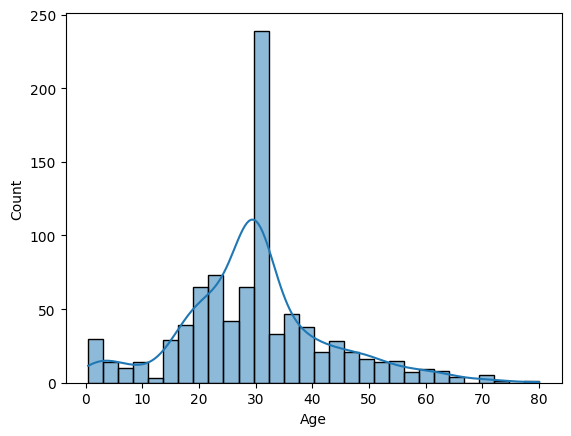

In [7]:
# Visualize distribution of age and fare
sns.histplot(df.Age, bins = 30, kde=True)
plt.show()

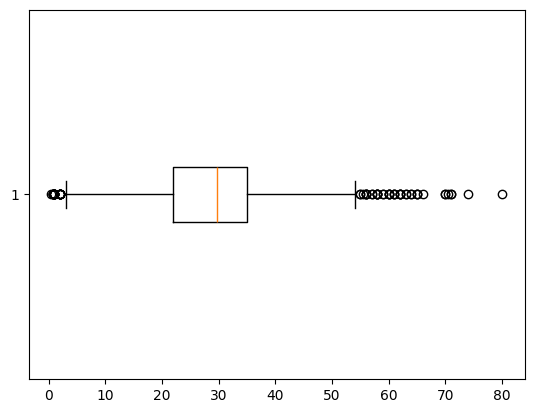

In [8]:
plt.boxplot(df.Age, orientation='horizontal')
plt.show()

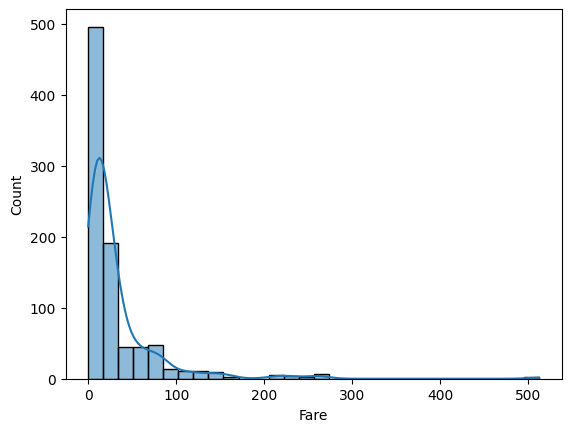

In [9]:
sns.histplot(df.Fare, bins = 30, kde=True)
plt.show()

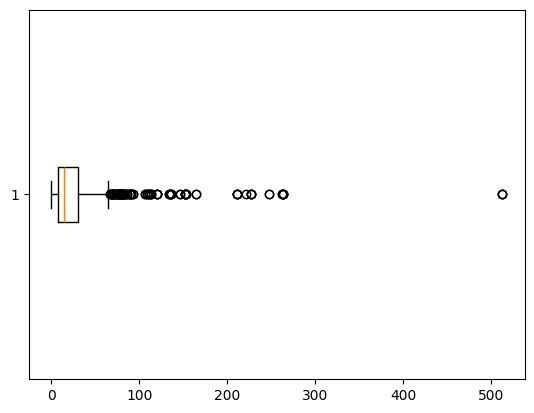

In [10]:
plt.boxplot(df.Fare, orientation='horizontal')
plt.show()

In [11]:
# See how kurtosis for both are different
from scipy.stats import kurtosis

kurt_age = kurtosis(df.Age, fisher=True)
kurt_fare = kurtosis(df.Fare, fisher=True)

print(f'Kurtosis for age: {kurt_age}')
print(f'Kurtosis for fare: {kurt_fare}')

Kurtosis for age: 0.9541389157820586
Kurtosis for fare: 33.20428925264474


## Outlier Detection & IQR Method

In [12]:
# Detect outliers using IQR method

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# filter values which are in the bounds
age_without_outliers = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]


# Calculations for fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# filter values which are in the bounds
fare_without_outliers = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

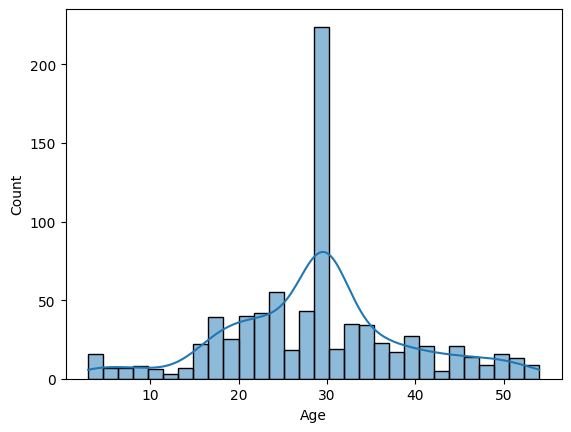

In [13]:
# Histogram and boxplots after removing outliers

sns.histplot(age_without_outliers['Age'], bins=30, kde=True)
plt.show()

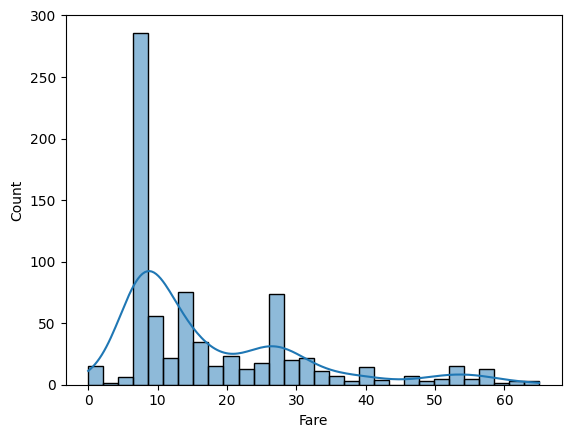

In [14]:
sns.histplot(fare_without_outliers['Fare'], bins=30, kde=True)
plt.show()

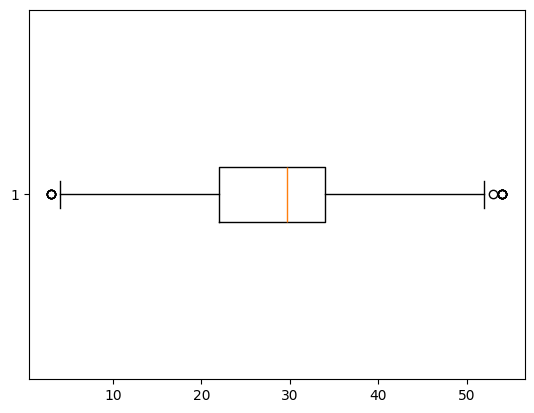

In [15]:
plt.boxplot(age_without_outliers['Age'], orientation='horizontal')
plt.show()

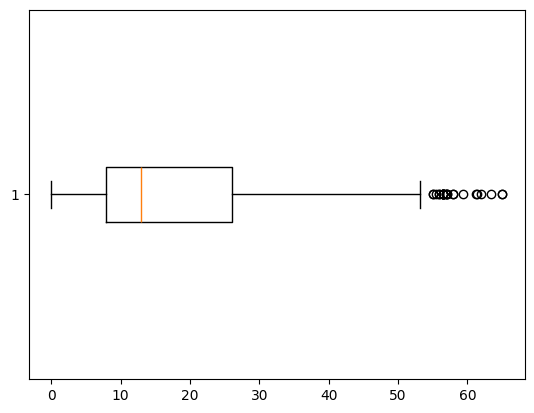

In [16]:
plt.boxplot(fare_without_outliers['Fare'], orientation='horizontal')
plt.show()

In [17]:
# See if this impacted kurtosis score
kurt_new_age = kurtosis(age_without_outliers['Age'])
kurt_new_fare = kurtosis(fare_without_outliers['Fare'])

print(f'Kurtosis for age: {kurt_new_age}')
print(f'Kurtosis for fare: {kurt_new_fare}')

Kurtosis for age: 0.32418382767557397
Kurtosis for fare: 1.4554560640283647


In [18]:
# Filtering using z-score {should be used only when data distribution is normal and not with skewed data}
# So in our case it should give abnormal results for Fare
from scipy.stats import zscore
import numpy as np

df['z-score-age'] = np.abs(zscore(df['Age']))
df['z-score-fare'] = np.abs(zscore(df['Fare']))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,z-score-age,z-score-fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.592481,0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.638789,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.284663,0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.407926,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.407926,0.486337


In [19]:
z_score_outlier_threshold = 3


age_without_outliers_zscore = df[df['z-score-age'] < z_score_outlier_threshold]
fare_without_outliers_zscore = df[df['z-score-fare'] < z_score_outlier_threshold]

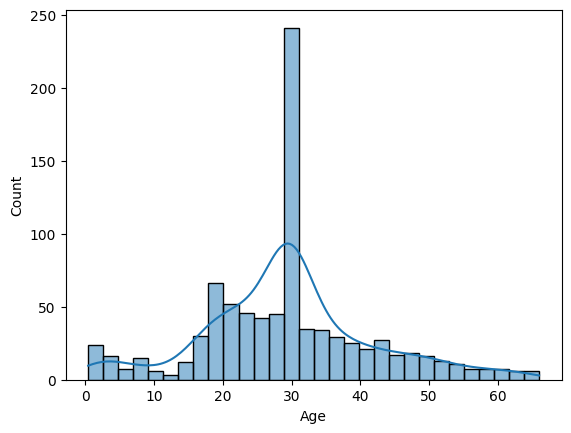

In [20]:
# Updated plots with z-score technique

sns.histplot(age_without_outliers_zscore['Age'], bins=30, kde=True)
plt.show()

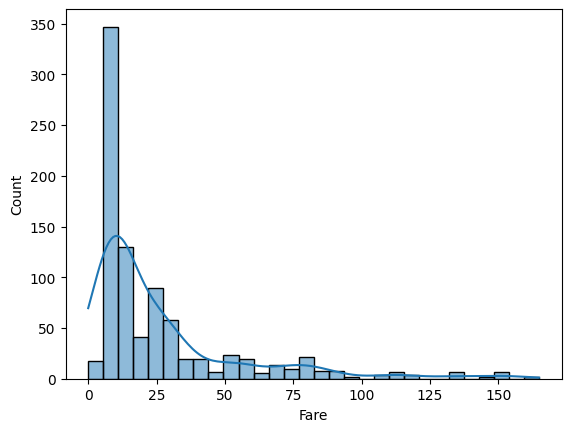

In [21]:

sns.histplot(fare_without_outliers_zscore['Fare'], bins=30, kde=True)
plt.show()

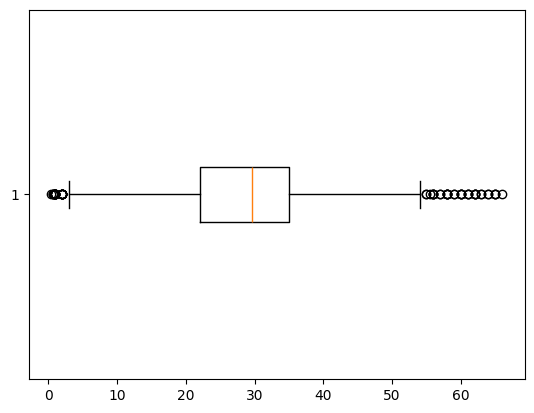

In [22]:
plt.boxplot(age_without_outliers_zscore['Age'], orientation='horizontal')
plt.show()

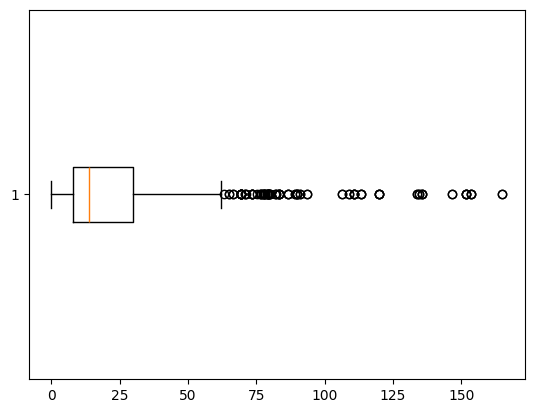

In [23]:
plt.boxplot(fare_without_outliers_zscore['Fare'], orientation='horizontal')
plt.show()

In [24]:
kurt_new_age_zscore = kurtosis(age_without_outliers_zscore['Age'])
kurt_new_fare_zscore = kurtosis(fare_without_outliers_zscore['Fare'])

print(f'Kurtosis for age: {kurt_new_age_zscore}')
print(f'Kurtosis for fare: {kurt_new_fare_zscore}')

Kurtosis for age: 0.5904572341366148
Kurtosis for fare: 5.266968870155699


In [25]:
# As expected IQR performed better becuase both the destributions were not totally normal destributions

## Confidence interval

In [26]:
# Calculate a 95% confidence interval for average passenger age.

<Axes: >

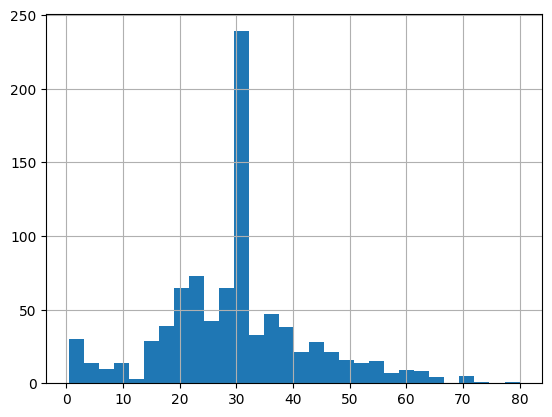

In [27]:
df.Age.hist(bins=30) # 95% of pass. ages should fall within 20-50 range by looking at hist

In [28]:
import scipy.stats as stats

sample_size = len(df.Age)
sample_mean = df.Age.mean()
confidence_level = 0.95

z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_score * (df.Age.std(ddof=1) / np.sqrt(sample_size))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Lower bound of age: {lower_bound}")
print(f"Upper bound of age: {upper_bound}")

Lower bound of age: 28.845388892334977
Upper bound of age: 30.552846401782663


In [29]:
# Using scipy's inbuilt method to do the same
low, upper = stats.norm.interval(confidence_level, loc = sample_mean, scale = df.Age.std(ddof=1) / np.sqrt(sample_size))

print(f"Lower bound of age: {low}")
print(f"Upper bound of age: {upper}")

Lower bound of age: 28.845388892334977
Upper bound of age: 30.552846401782663


## Hypothesis testing

In [30]:
# Test if the mean fare of male vs. female passengers is significantly different.

In [31]:
df['sex_bool'] = df['Sex'].map(lambda x: 0 if x == "male" else 1)
df.head()

df_male = df[(df['sex_bool'] == 0)]
df_female = df[(df['sex_bool'] == 1)]

print(df_male['Fare'].median())
print(df_female['Fare'].median())

# So we can hypothetically assume that avg fare of female was higher than male

10.5
23.0


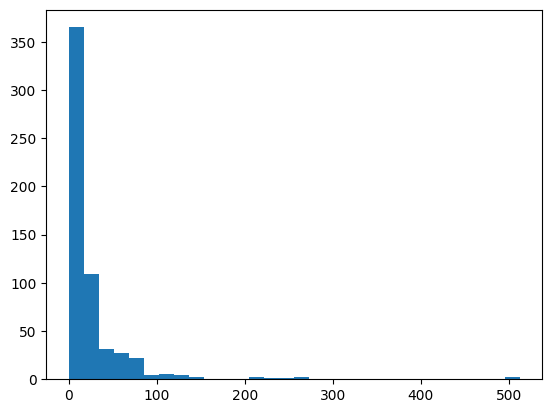

In [32]:
plt.hist(x=df_male.Fare, bins=30)
plt.show()

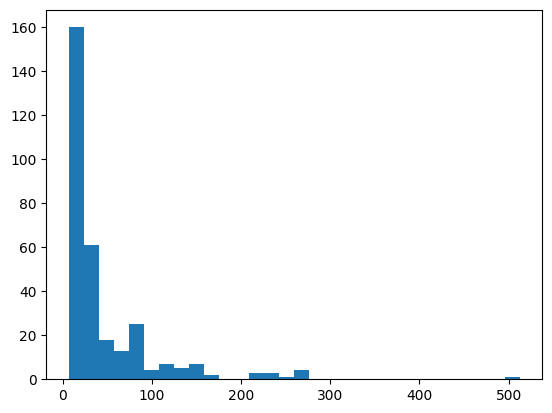

In [33]:
plt.hist(x=df_female.Fare, bins=30)
plt.show()

In [34]:
# H0 -> Average ticket fare for both men and women was equal
# H1 -> Female paid higher price for tickets

t_stat, p_val = stats.ttest_ind(df_male['Fare'], df_female['Fare'])

print(f"P-Val for the data was: {p_val}")

# This means we can reject the null hypothesis (H0) and females actually paid higher prices for ticket than men.

P-Val for the data was: 4.230867870042998e-08


# Chi-Squared test

In [35]:
# Task: Test if "Survival" is dependent on "Gender" using a chi-square test.

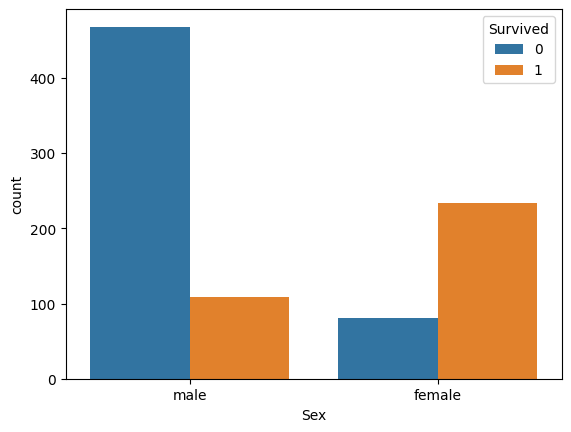

In [36]:
# Countplot for checking survival rates of males and females
sns.countplot(x = 'Sex', data=df, hue="Survived")
plt.show() # It gives us an hypthesis that females survived more than male

In [37]:
# Test the above hyp.
# H0 -> Females survived less
# H1 -> Females survided more
# p < 0.01 discard H0


contigentcy_table = pd.crosstab(df['Sex'], df['Survived'])
contigentcy_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [38]:
chi2, p, dof, expected = stats.chi2_contingency(contigentcy_table)
print(chi2)
print(p)


260.71702016732104
1.197357062775565e-58


In [39]:
# Task: Determine the required sample size for testing if 1st class passengers had a survival advantage.

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,z-score-age,z-score-fare,sex_bool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.592481,0.502445,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.638789,0.786845,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.284663,0.488854,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.407926,0.420730,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.407926,0.486337,0


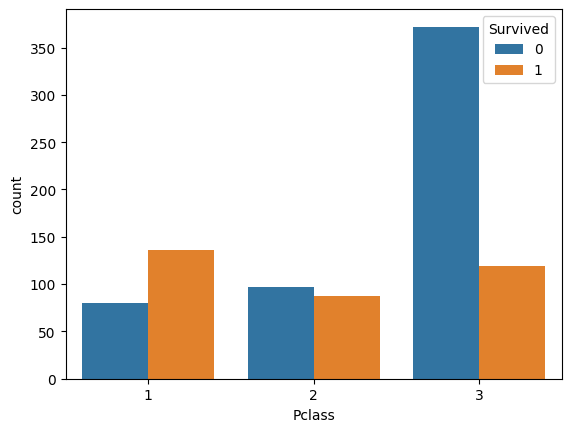

In [41]:
# Lets fist visualise countplot between pClass and survived

sns.countplot(x = 'Pclass', data = df, hue='Survived')
plt.show()

# So our graph says so. That the chances of you suriviving if you were in a First class were quite high than in 3rd

In [43]:
# Let's calculate the required sample size to test this hypothesis or do Power Analayis
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

first_class_df = df[df['Pclass'] == 1]['Survived'].mean()
other_classes_df = df[df['Pclass'] != 1]['Survived'].mean()

effect_size = proportion_effectsize(first_class_df, other_classes_df)

power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(alpha=0.05, power=0.8, effect_size=effect_size, alternative='larger')

print(f"Required sample size per group: {sample_size}")

Required sample size per group: 28.17387683126524


In [44]:
# Lets run a chi-2 test to test out our hypothesis, as we already have more than 28 data point

c_table = pd.crosstab(df['Pclass'], df['Survived'])
res = stats.chi2_contingency(c_table)
res

Chi2ContingencyResult(statistic=np.float64(102.88898875696056), pvalue=np.float64(4.549251711298793e-23), dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [ ]:
# Yes so we can say that our hypothesis about being in 1st class and getting more chances of survival was correct

# Task: Compare "Fare" across different "Passenger Classes" using ANOVA.

In [69]:
# As we're only checking how one categorical variable (Pclass) affects one numerical variable (Fare).
# We will use 1-way ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Fare ~ C(Pclass)', data = df).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

                 sum_sq     df           F        PR(>F)
C(Pclass)  7.760301e+05    2.0  242.344157  1.031376e-84
Residual   1.421769e+06  888.0         NaN           NaN


In [72]:
# It means yes, there's a signifcant amount of price difference between the tickets based on class
# Lets find out the culprit with turke hsd test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Fare'], groups=df['Pclass'], alpha=0.05)
tukey.summary()

# As the table also suggests
# Difference in fare between 1 and 2/3 classes is hightest and null hyp. can be rejected

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-63.4925,0.0,-72.9165,-54.0685,True
1,3,-70.4791,0.0,-78.1489,-62.8094,True
2,3,-6.9866,0.108,-15.1064,1.1331,False
